In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf


# Data

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)



# Linear Reg

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_full, y_train_full)

LinearRegression()

In [8]:
y_test_pred = lin_reg.predict(X_test)

mean_squared_error(y_test_pred, y_test)

0.5411287478470679

# ANN

In [10]:
X_train.shape

(11610, 8)

## Standardization

In [36]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_valid_std = std.transform(X_valid)
X_test_std = std.transform(X_test)

## model

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1800      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 24961 (97.50 KB)
Trainable params: 24961 (97.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
ann_model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
history = ann_model.fit(X_train_std, y_train, epochs=200,
                    validation_data=(X_valid_std, y_valid))

Epoch 1/200


363/363 [==============================] - 0s 786us/step - loss: 0.6787 - val_loss: 0.9182
Epoch 2/200
363/363 [==============================] - 0s 655us/step - loss: 0.3710 - val_loss: 2.0550
Epoch 3/200
363/363 [==============================] - 0s 670us/step - loss: 0.3539 - val_loss: 0.4606
Epoch 4/200
363/363 [==============================] - 0s 651us/step - loss: 0.3335 - val_loss: 0.4965
Epoch 5/200
363/363 [==============================] - 0s 647us/step - loss: 0.3195 - val_loss: 0.4590
Epoch 6/200
363/363 [==============================] - 0s 646us/step - loss: 0.3100 - val_loss: 0.6736
Epoch 7/200
363/363 [==============================] - 0s 642us/step - loss: 0.3119 - val_loss: 0.4466
Epoch 8/200
363/363 [==============================] - 0s 645us/step - loss: 0.2986 - val_loss: 0.5112
Epoch 9/200
363/363 [==============================] - 0s 651us/step - loss: 0.2907 - val_loss: 0.3785
Epoch 10/200
363/363 [==============================] - 0s 654us/step - loss: 0.2894 

In [62]:
y_test_pred = ann_model.predict(X_test_std)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
rmse

  1/162 [..............................] - ETA: 1s

162/162 [==============================] - 0s 296us/step


0.5536994160884198

## plot

In [63]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

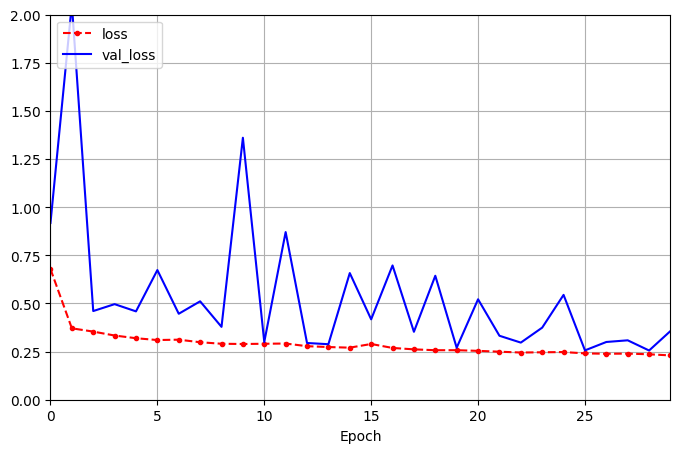

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 2], grid=True, xlabel="Epoch",
    style=["r--.", "b-"])
plt.legend(loc="upper left")  # extra code
plt.show()